In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 


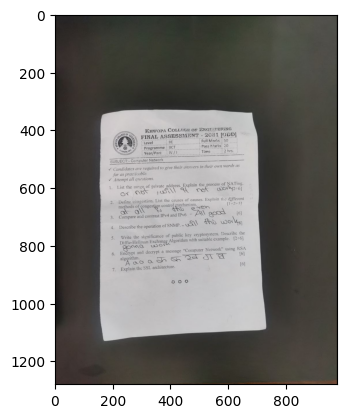

In [6]:
img_formal=cv2.imread('image.png')
img_formal=cv2.cvtColor(img_formal,cv2.COLOR_BGR2RGB)
img_raw=cv2.imread('img.png',cv2.COLOR_BGR2RGB)
img_raw=cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB)

plt.imshow(img_formal)
plt.imshow(img_raw)

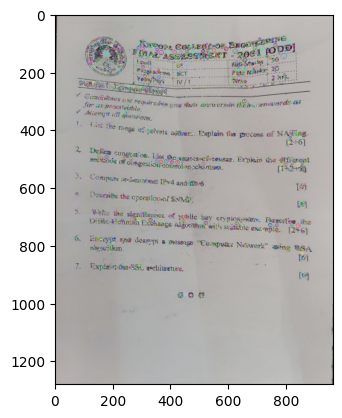

In [7]:
sift_init=cv2.SIFT_create()
kp_alignval,desc_alignval=sift_init.detectAndCompute(img_formal,None)
img_with_keypoints = cv2.drawKeypoints(img_formal,kp_alignval,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_keypoints)

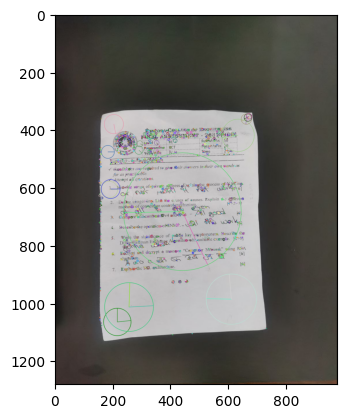

In [8]:

kp_val,desc_val=sift_init.detectAndCompute(img_raw,None)
img_with_keypoints = cv2.drawKeypoints(img_raw,kp_val,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_keypoints)

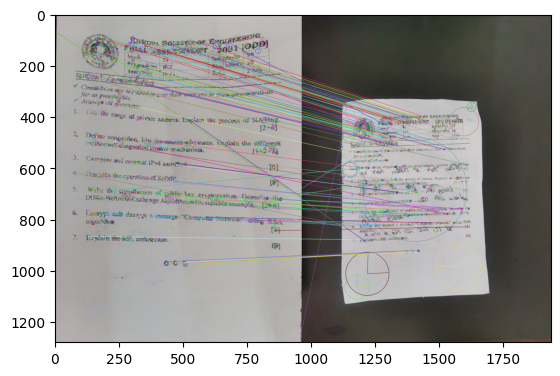

In [9]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches=bf.match(desc_alignval,desc_val)

matches = sorted(matches, key=lambda x: x.distance)
result  = cv2.drawMatches(img_formal, kp_alignval, img_raw, kp_val, matches[:100], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(result)

In [10]:
kp_alignval[matches[0].trainIdx].pt


(215.6290283203125, 572.6842041015625)

In [11]:
kp_alignval[matches[0].queryIdx].pt


(433.5971374511719, 972.305419921875)

In [12]:
matches

[< cv2.DMatch 000001F4D0A67D30>,
 < cv2.DMatch 000001F4D0990290>,
 < cv2.DMatch 000001F4D0A67D50>,
 < cv2.DMatch 000001F4D336C0D0>,
 < cv2.DMatch 000001F4D336C270>,
 < cv2.DMatch 000001F4D336C350>,
 < cv2.DMatch 000001F4D336C370>,
 < cv2.DMatch 000001F4CF876230>,
 < cv2.DMatch 000001F4D0A67DD0>,
 < cv2.DMatch 000001F4D336C470>,
 < cv2.DMatch 000001F4D0A67E30>,
 < cv2.DMatch 000001F4D336C0B0>,
 < cv2.DMatch 000001F4D0A66CD0>,
 < cv2.DMatch 000001F4D336D590>,
 < cv2.DMatch 000001F4D0A679F0>,
 < cv2.DMatch 000001F4D336C890>,
 < cv2.DMatch 000001F4D0A67250>,
 < cv2.DMatch 000001F4D0A65910>,
 < cv2.DMatch 000001F4D336C130>,
 < cv2.DMatch 000001F4D336CFF0>,
 < cv2.DMatch 000001F4D336C110>,
 < cv2.DMatch 000001F4D0A67310>,
 < cv2.DMatch 000001F4D0A66C50>,
 < cv2.DMatch 000001F4D336C6D0>,
 < cv2.DMatch 000001F4D336D710>,
 < cv2.DMatch 000001F4D0A672F0>,
 < cv2.DMatch 000001F4D336C990>,
 < cv2.DMatch 000001F4D0A65F50>,
 < cv2.DMatch 000001F4D0A67F50>,
 < cv2.DMatch 000001F4D336E510>,
 < cv2.DMa

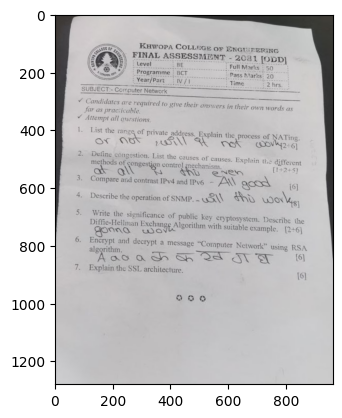

In [13]:
src_pts = np.float32([kp_alignval[m.queryIdx].pt for m in matches[:50]]).reshape(-1,1, 2)
dst_pts = np.float32([kp_val[m.trainIdx].pt for m in matches[:50]]).reshape(-1,1, 2)


M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
h,w=img_formal.shape[:2]

final_img_allign=cv2.warpPerspective(img_raw,M,(w,h))

plt.imshow(final_img_allign)